Inicio proyecto de 0 || Check de archvivos disponibles

In [1]:
##Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime
import datetime as dt

In [2]:
#datos_diarios_completa

df_datos_diarios_completa = pd.read_csv('datos_diarios_completa.csv', sep=';')
print(df_datos_diarios_completa.head())
print(df_datos_diarios_completa.info())

    ID     FECHA  DIA      Consumo  Tmed  Feriado  Personas
0  1.0  1/7/2021  4.0  447,2708333  10,6      0.0    5034.0
1  2.0  2/7/2021  5.0  388,2395833  10,2      0.0    5649.0
2  3.0  3/7/2021  6.0    383,40625   9,6      0.0    7692.0
3  4.0  4/7/2021  7.0  388,7916667  13,3      0.0    6640.0
4  5.0  5/7/2021  1.0  400,1479167  12,8      0.0    4680.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        304 non-null    float64
 1   FECHA     304 non-null    object 
 2   DIA       304 non-null    float64
 3   Consumo   304 non-null    object 
 4   Tmed      304 non-null    object 
 5   Feriado   304 non-null    float64
 6   Personas  304 non-null    float64
dtypes: float64(4), object(3)
memory usage: 49.8+ KB
None


In [3]:
df_datos_diarios_completa.dropna(inplace=True)
df_datos_diarios_completa["Consumo"] = df_datos_diarios_completa["Consumo"].apply(lambda x: x.replace(',', '.'))


In [4]:
df_datos_diarios_completa['FECHA'] = df_datos_diarios_completa['FECHA'].astype(str)
df_datos_diarios_completa['Consumo'] = df_datos_diarios_completa['Consumo'].astype(float)

In [5]:
df_datos_diarios_completa['FECHA'] = df_datos_diarios_completa['FECHA'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d/%m/%Y'))
df_datos_diarios_completa['FECHA'].head()

0   2021-07-01
1   2021-07-02
2   2021-07-03
3   2021-07-04
4   2021-07-05
Name: FECHA, dtype: datetime64[ns]

In [6]:
print(df_datos_diarios_completa.FECHA.min())
print(df_datos_diarios_completa.FECHA.max())

2021-07-01 00:00:00
2022-04-30 00:00:00


In [7]:
df_datos_diarios_completa['dia_mes_año'] = df_datos_diarios_completa['FECHA'].dt.strftime('%d-%m-%Y')
df_datos_diarios_completa['mes_año'] = df_datos_diarios_completa['FECHA'].dt.strftime('%Y-%m')
#df_datos_diarios_completa['mes_año'] = pd.to_datetime(df_datos_diarios_completa['mes_año'], errors='coerce')


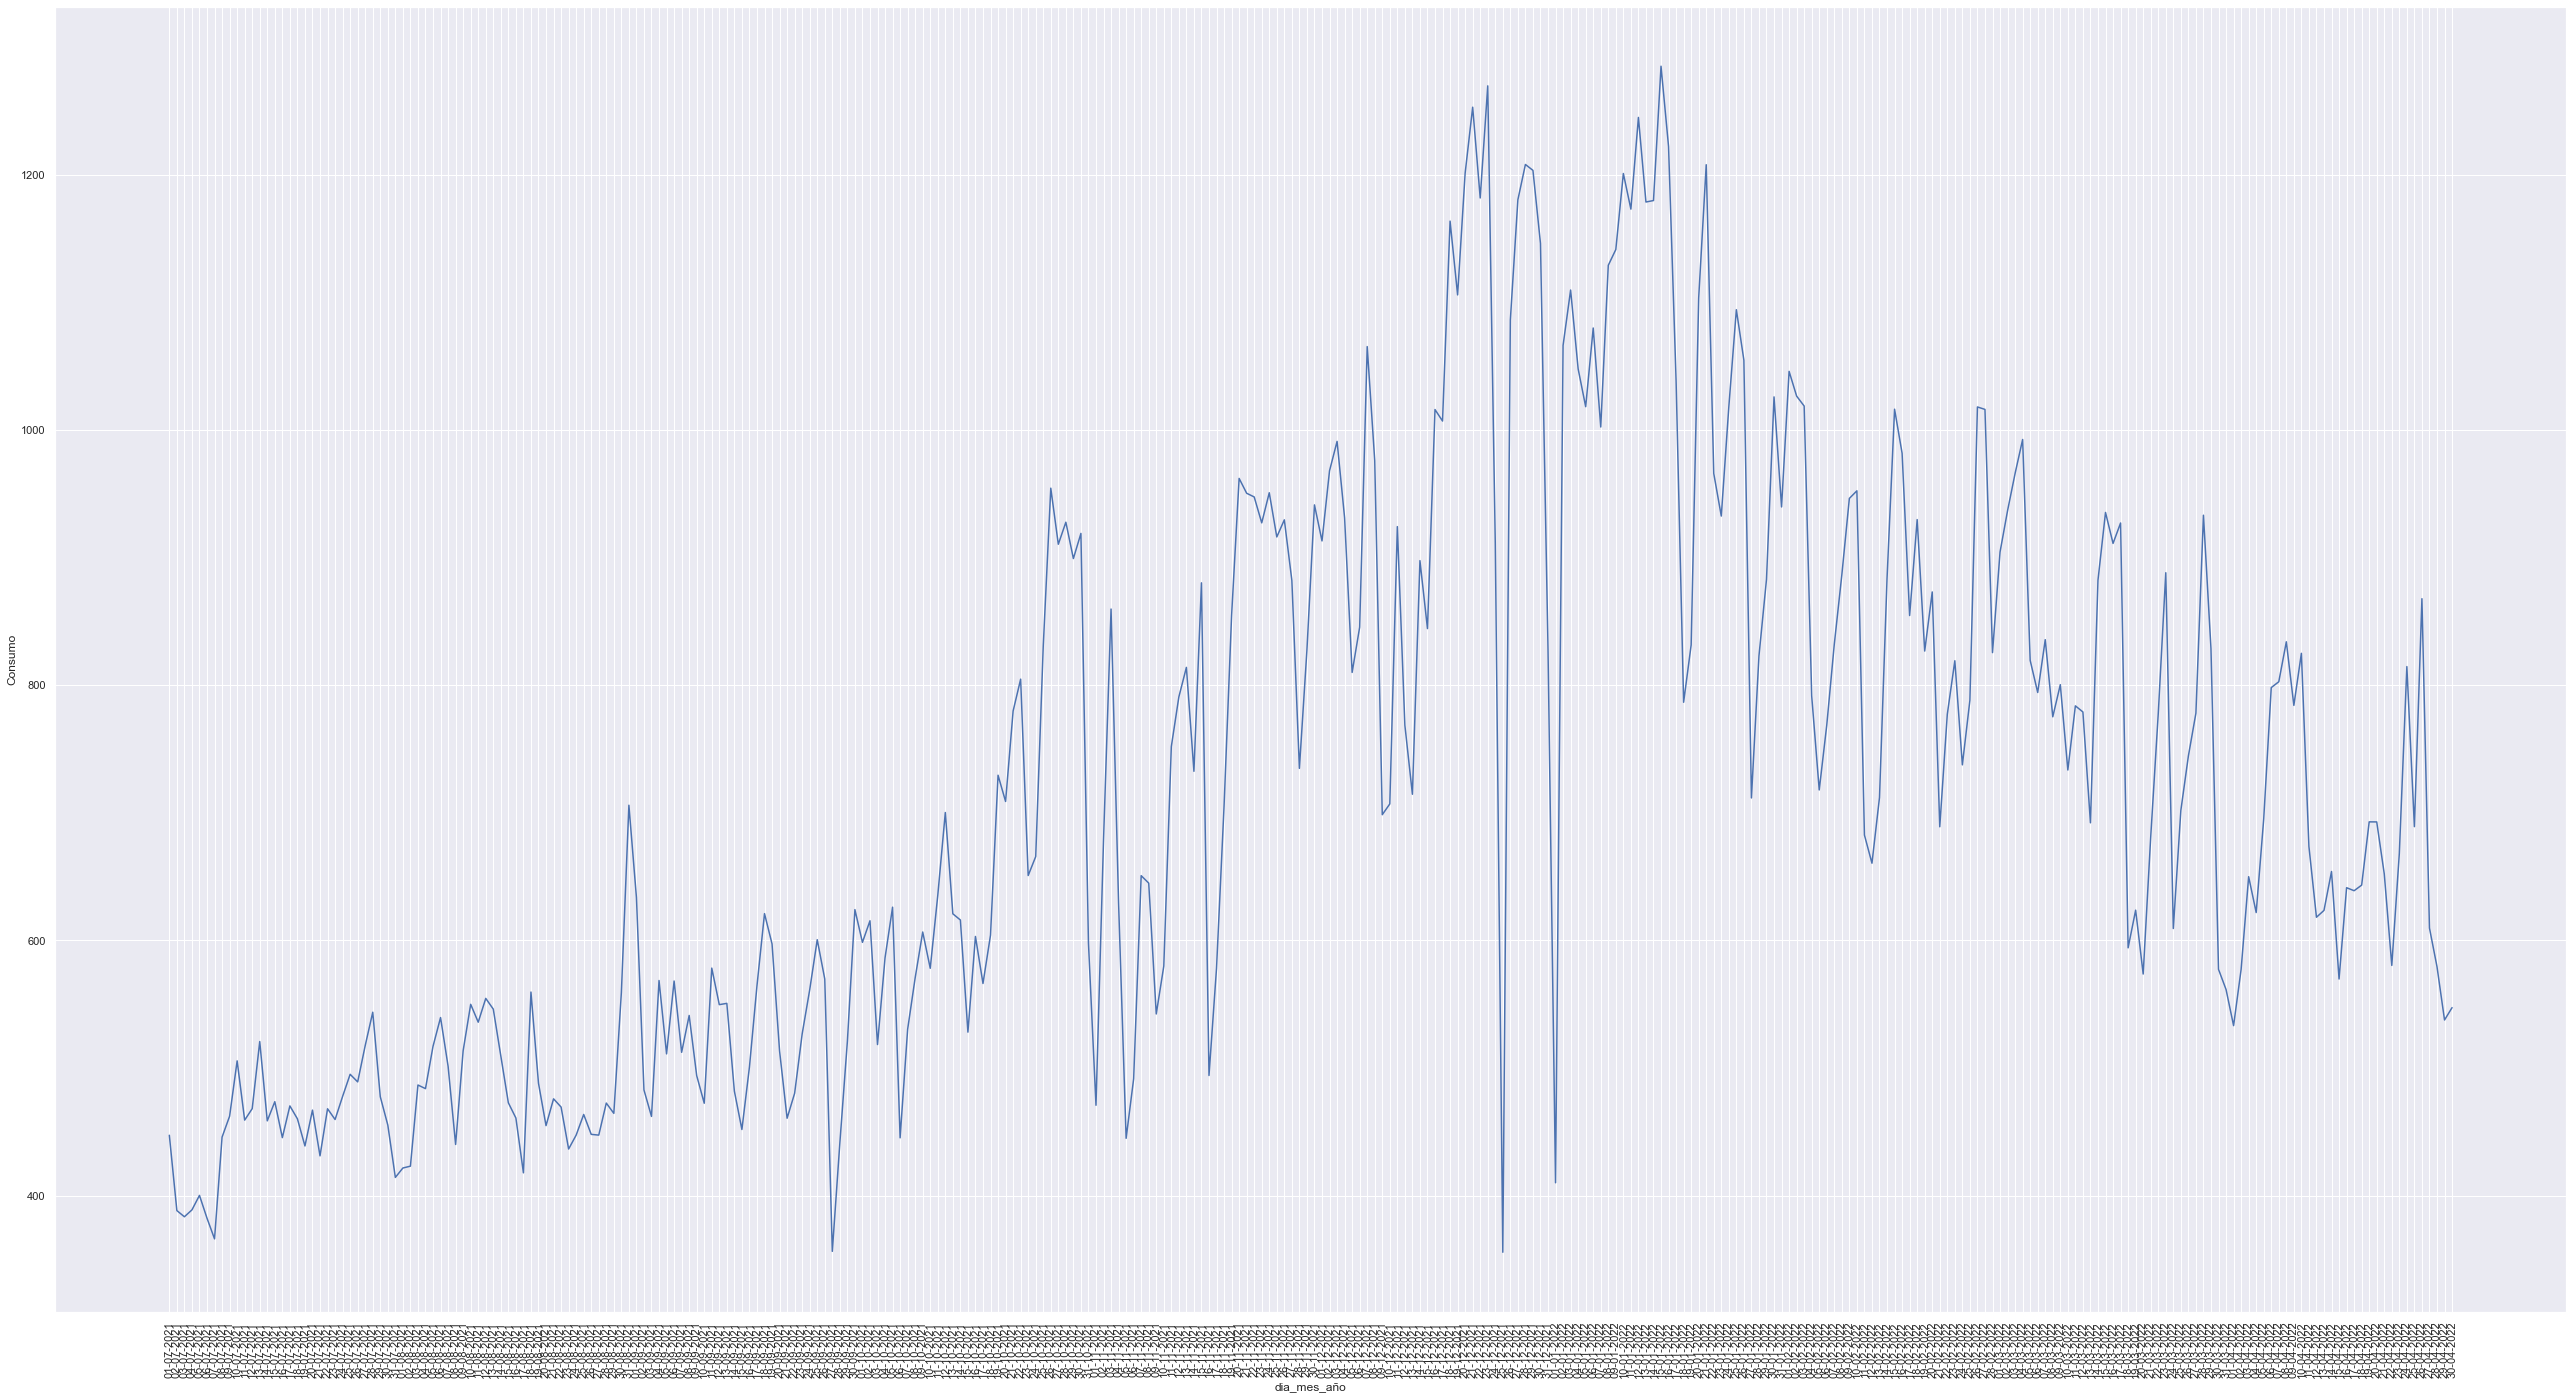

In [27]:
plt.figure(figsize=(45,24))
chart = sns.lineplot(
    data=df_datos_diarios_completa,
    x='dia_mes_año',
    y="Consumo",
    palette='Set1'
)
chart.tick_params(axis='x', labelrotation=90)


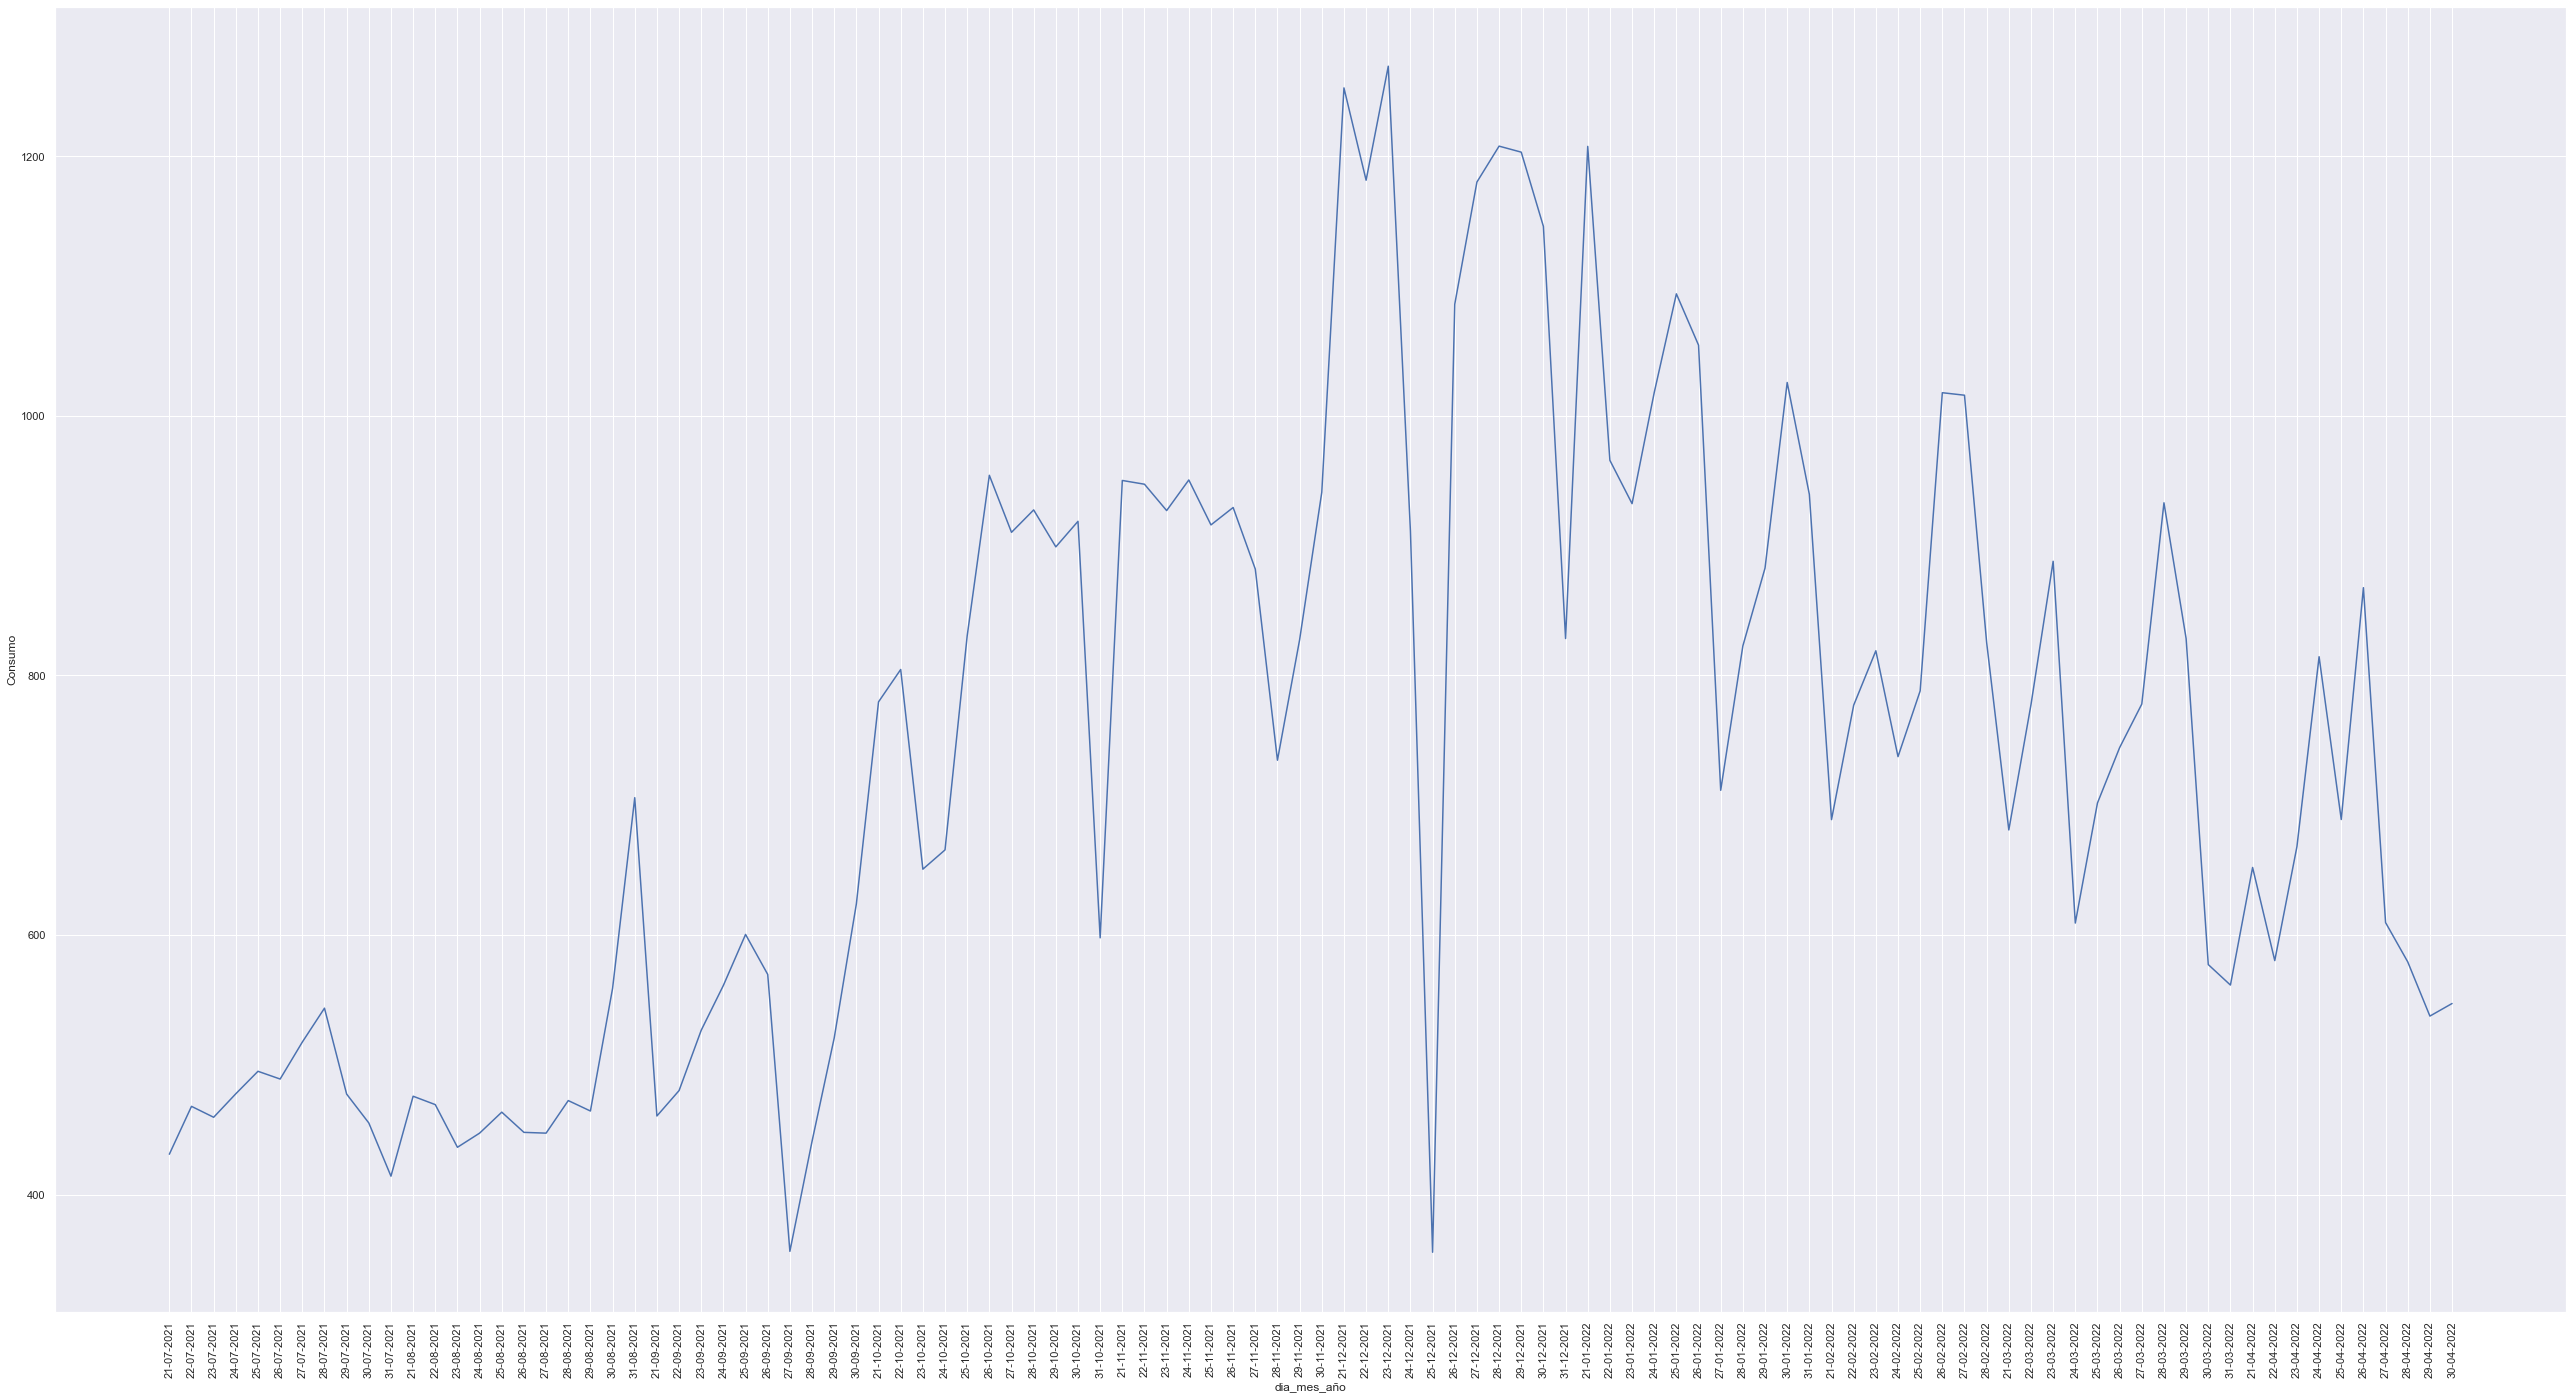

In [28]:
plt.figure(figsize=(45,24))
chart = sns.lineplot(
    data=df_datos_diarios_completa[df_datos_diarios_completa['dia_mes_año']> '2021-07-01 00:00:00'],
    x='dia_mes_año',
    y="Consumo",
    palette='Set1'
)
chart.tick_params(axis='x', labelrotation=90)

In [9]:
print(df_datos_diarios_completa.mes_año.min())
print(df_datos_diarios_completa.mes_año.max())

2021-07
2022-04


In [10]:
df_reducido= df_datos_diarios_completa[df_datos_diarios_completa['mes_año'] >= '2021-01']

<AxesSubplot:xlabel='mes_año', ylabel='Consumo'>

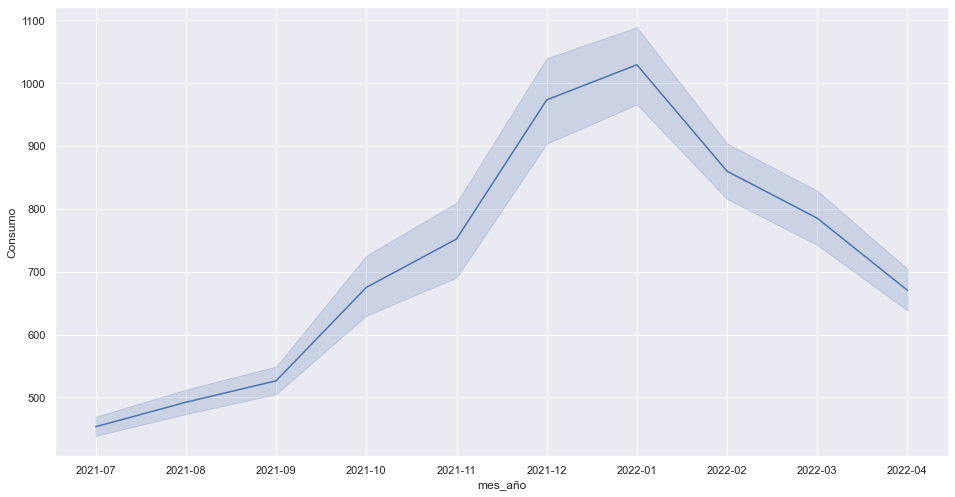

In [11]:
sns.set(rc={'figure.figsize':(16,8.27)})
sns.lineplot(x="mes_año", y="Consumo",
             data=df_reducido)